#Тема “Создание признакового пространства”

###Продолжим обработку данных с Твиттера. 

In [4]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_les_1 = '/content/drive/MyDrive/Colab Notebooks/GB/Introduction to Natural Language Processing/lesson_1'

In [5]:
combine_df = pd.read_pickle(f'{path_les_1}/prepared_dataframe.pkl')

In [6]:
combine_df.head(5)

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [50]:
combine_df['label'].unique()

array([ 0.,  1., nan])

###1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.

* Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
* Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
*	Исключим стоп-слова с помощью stop_words='english'. 
*	Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1), 
                                   max_df=0.9,
                                   preprocessor=' '.join,
                                   max_features=1000,
                                   stop_words='english',
                                   analyzer='word', 
                                   binary=False,)

In [24]:
tweet_stemmed_bag_of_words = count_vectorizer.fit_transform(combine_df['tweet_stemmed'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
df_tweet_stemmed_bag_of_words = pd.DataFrame(tweet_stemmed_bag_of_words.toarray(), columns = feature_names)
df_tweet_stemmed_bag_of_words.head(5)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,anti,...,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df_tweet_stemmed_bag_of_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, abl to yummi
dtypes: int64(1000)
memory usage: 375.1 MB


In [26]:
tweet_lemmatized_bag_of_words = count_vectorizer.fit_transform(combine_df['tweet_lemmatized'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
df_tweet_lemmatized_bag_of_words = pd.DataFrame(tweet_lemmatized_bag_of_words.toarray(), columns = feature_names)
df_tweet_lemmatized_bag_of_words.head(5)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,award,...,wild,win,wine,winner,wisdom,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df_tweet_lemmatized_bag_of_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, able to yummy
dtypes: int64(1000)
memory usage: 375.1 MB


###2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
*	Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
*	Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
*	Исключим стоп-слова с помощью stop_words='english'.
*	Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features = 1000, stop_words='english', preprocessor=' '.join,)

In [39]:
tfidf_tweet_stemmed = tfidf_vectorizer.fit_transform(combine_df['tweet_stemmed'])
# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
df_tfidf_tweet_stemmed = pd.DataFrame(tfidf_tweet_stemmed.toarray(), columns = feature_names)
df_tfidf_tweet_stemmed.head(5)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,anti,...,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744148,0.392399,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [41]:
df_tfidf_tweet_stemmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, abl to yummi
dtypes: float64(1000)
memory usage: 375.1 MB


In [40]:
tfidf_tweet_lemmatized = tfidf_vectorizer.fit_transform(combine_df['tweet_lemmatized'])
# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
df_tfidf_tweet_lemmatized = pd.DataFrame(tfidf_tweet_lemmatized.toarray(), columns = feature_names)
df_tfidf_tweet_lemmatized.head(5)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,award,...,wild,win,wine,winner,wisdom,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.742113,0.39173,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0


In [42]:
df_tfidf_tweet_lemmatized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, able to yummy
dtypes: float64(1000)
memory usage: 375.1 MB


###3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы.

In [44]:
path_les_2 = '/content/drive/MyDrive/Colab Notebooks/GB/Introduction to Natural Language Processing/lesson_2'
data = open(f'{path_les_2}/corpus.txt').read()

In [45]:
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [51]:
trainDF['label'].unique()

array(['__label__2', '__label__1'], dtype=object)

In [62]:
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [48]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [112]:
def get_score_count_vectorizer(param_max_features, param_max_df):
  print(f'{param_max_features} {param_max_df}')
  
  count_vect = CountVectorizer(analyzer='word', 
                               token_pattern=r'\w{1,}', 
                               max_features=param_max_features)
  
  count_vect.fit(trainDF['text'])

  xtrain_count =  count_vect.transform(train_x)
  xvalid_count =  count_vect.transform(valid_x)

  classifier = linear_model.LogisticRegression()
  classifier.fit(xtrain_count, train_y)
  predictions = classifier.predict(xvalid_count)
  # predictions
  # xtrain_count.shape
  return accuracy_score(valid_y, predictions)

In [113]:
def test_params(params, title):
  plt.figure(figsize=(16,7))

  names = []
  values = []

  for index, param in params.iterrows():
    accuracy_score = get_score_count_vectorizer(param['param_max_features'],
                                                 param['param_max_df'])
    _label = index
    names.append(_label)
    values.append(accuracy_score)

  plt.bar(names, values)
  plt.title(title)
  plt.grid()
  plt.show()

  print(values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


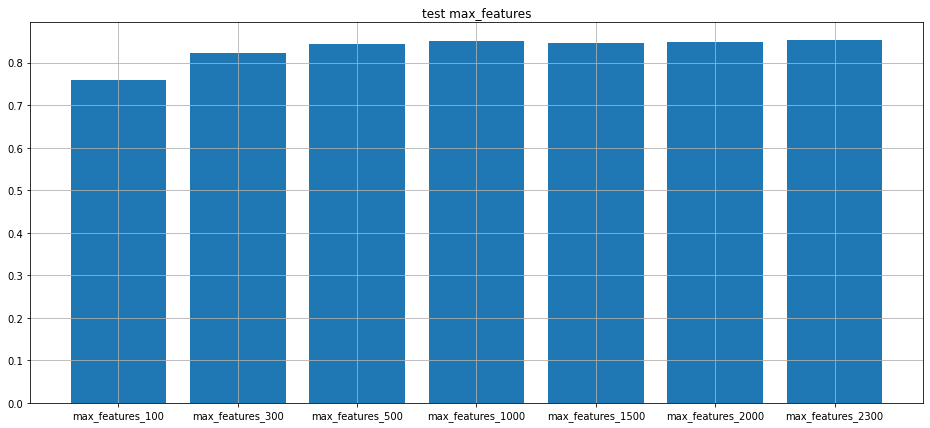

[0.76, 0.8216, 0.844, 0.8512, 0.8472, 0.8496, 0.852]


In [81]:
params_dict = {'param_max_features': [100, 300, 500, 1000, 1500, 2000, 2300]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test max_features')

По графику видно что особенный рост score идет до 1000 max_features и потом падает и судя по всему начинает прыгать, возможно это говорит о переобучении

In [114]:
params_dict = {'param_max_features': [100, 300, 1000],
               'param_max_df': [0.2, 0.4, 0.8]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test max_df')

100.0 0.2


ValueError: ignored

<Figure size 1152x504 with 0 Axes>